# Investigating Factors of Rising House Values in New York City

Team Members: Francisco Brady (fbrady), Zhonghan Xie (jonasxie), Michael Garner (mngarner)
Date: 2024-10-15

## Introduction
### Overview of the Project
The inflation of the last few years has affected all areas of the economy, and for graduate students who are looking to move on to the next stage of their lives, the cost of living is a major concern. One of the largest components of the cost of living is housing. For this project, we will be analyzing the housing market in New York City, to determine the impact of rising house prices. In addition, we will be looking at the relationship between house prices and the rate of evictions in the city.

### Motivations

As house prices continue to rise in New York City, the ripple effects on communities are profound. For example, the median home price in NYC reached approximately \$754,000 as of September 2024, 29.5\% increase from that of September 2017. While rapidly increasing property values may signal economic growth, they also contribute to housing instability and displacement, particularly among lower-income residents. At the same time, access to quality educational resources remains a crucial factor for many families in deciding where to live. In areas where public schools are highly rated, home prices often exceed city averages, reflecting the economic value of educational resources placed on educational quality. This project aims to investigate the factors that contribute to rising house prices in NYC, their impact on eviction rates and the intersection between availability of educational resources and housing markets. By understanding these relationships, we hope to inform policymakers and community stakeholders on how to address the challenges of access to quality education, housing affordability and stability in the city.


Refereces:
- [Zillow Research: New York City House Value](https://www.zillow.com/home-values/6181/new-york-ny/?msockid=050262ffa66f68bc07d876dda76b6905)

## Data Sources

House price data: We use the house value index as the proxy of the average house price in each neighborhood in New York City. We pulled the data from [Zillow Research](https://www.zillow.com/research/data/?msockid=38d5e17d86ff660f269ef545876967bd), the research department of a real-estate marketplace company. The data is available at the neighborhood level and is updated monthly.

## Data Description

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### House Value Index Data
- Read in the neighborhood-level house value index data from Zillow Research.
- Reshape the data from wide form to long form.
- Aggregate the data to the county-year level.
- Do some exploratory data analysis and visualization

In [2]:
# Import data
neighbor_HVI = pd.read_csv('./data/zillow_HVI_neighborhood.csv.gz', compression='gzip')

In [3]:
# Filter the data to New York City
nyc_neighbor_HVI = neighbor_HVI[neighbor_HVI['City'] == 'New York']

In [4]:
# Keeping only the columns that are relevant
nyc_neighbor_HVI.drop(columns = ['City', 'State', 'Metro', 'StateName', 'SizeRank', 'RegionType'], inplace = True)

/var/folders/6h/pl4jttxn04s6tt3cys_lkyl40000gn/T/ipykernel_89264/203724963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_neighbor_HVI.drop(columns = ['City', 'State', 'Metro', 'StateName', 'SizeRank', 'RegionType'], inplace = True)


In [5]:
nyc_neighbor_HVI.sample(5)

,RegionID,RegionName,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
292,276345,Glendale,Queens County,268270.606933,269445.440742,270916.864720,272890.461803,274108.286825,275019.367161,275863.135755,...,786813.007523,786373.077934,786788.343732,789574.043835,794568.686080,798017.743601,798170.463963,798138.922179,800162.491868,804031.647615
6564,403198,Richmond Valley,Richmond County,289007.709944,291285.783172,291436.058888,293145.368174,295891.044818,301420.300780,307930.714684,...,832675.237258,834633.711362,838547.777817,845218.164264,851601.761450,858906.675178,862689.963426,864346.681766,863879.121183,864712.483702
811,403211,Longwood,Bronx County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,415187.110785,417916.063335,421704.087075,427605.868363,432042.699104,436902.064819,438979.151595,439414.903170,437251.025435,435176.894237
438,270797,Auburndale,Queens County,286731.196879,288319.573169,290209.551263,293829.839869,297679.429921,301549.044274,305303.752128,...,949090.206316,950257.097241,952765.464358,958523.501585,966976.583537,973618.218718,974383.722275,973569.516385,975049.886739,979649.874532
1340,403204,Castleton Corners,Richmond County,221803.310565,222831.877439,223798.566864,226223.743847,228761.997081,231197.930772,233386.969104,...,696064.158983,697028.837951,700019.324208,704343.778210,709190.744126,712610.786410,714118.992613,714515.108825,715792.373127,717610.620384


In [6]:
# Reshape the data from wide to long
nyc_neighbor_HVI_long = pd.melt(nyc_neighbor_HVI, id_vars = ['RegionID','RegionName','CountyName'], var_name = 'Date', value_name = 'HVI')

In [7]:
# Convert the Date column to datetime and extract the year
nyc_neighbor_HVI_long['Date'] = pd.to_datetime(nyc_neighbor_HVI_long['Date'])
nyc_neighbor_HVI_long['Year'] = nyc_neighbor_HVI_long['Date'].dt.year

In [8]:
# inspect the dataframe
nyc_neighbor_HVI_long.sample(5)

,RegionID,RegionName,CountyName,Date,HVI,Year
53018,8349,College Point,Queens County,2022-03-31,792116.738160,2022
26971,32192,Jamaica Estates,Queens County,2011-04-30,563521.824635,2011
38410,272902,Bedford-Stuyvesant,Kings County,2016-02-29,698753.722439,2016
21535,343215,Tremont,Bronx County,2009-01-31,230903.223627,2009
19783,274285,Laurelton,Queens County,2008-04-30,409173.531928,2008


In [9]:
# Save the Neighborhood HVI data
nyc_neighbor_HVI_long.to_csv('./data/nyc_neighbor_HVI.csv.gz', index = False, compression='gzip')

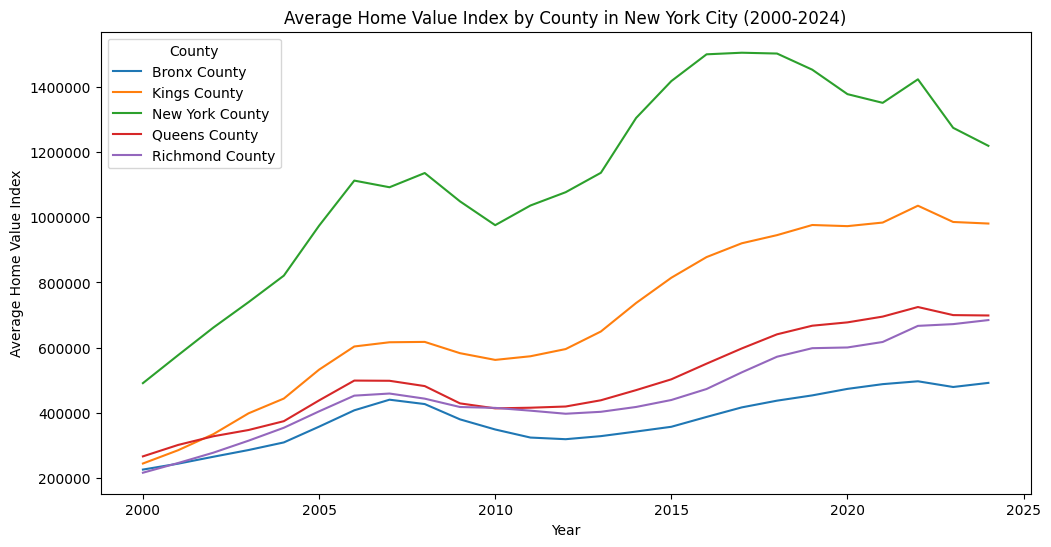

In [13]:
# Calculate the average HVI for each County by year
nyc_county_HVI_avg = nyc_neighbor_HVI_long.groupby(['CountyName','Year']).agg({'HVI':'mean'}).reset_index()

# Plot the average HVI for each County by year
plt.figure(figsize=(12,6))
sns.lineplot(data = nyc_county_HVI_avg, x = 'Year', y = 'HVI', hue = 'CountyName')
plt.title('Average Home Value Index by County in New York City (2000-2024)')
plt.xlabel('Year')
plt.ylabel('Average Home Value Index')
plt.ticklabel_format(style='plain', axis='y') 
plt.legend(title = 'County')
#plt.grid(True)
plt.show()

The house value of all counties in New York City increased significantly over the 24 years. The house value index of New York County increased the most, followed by Kings County and Queens County. The average house value decreased after 2008, suggesting the impact of the financial crisis. But the average house value has been increasing since 2012.

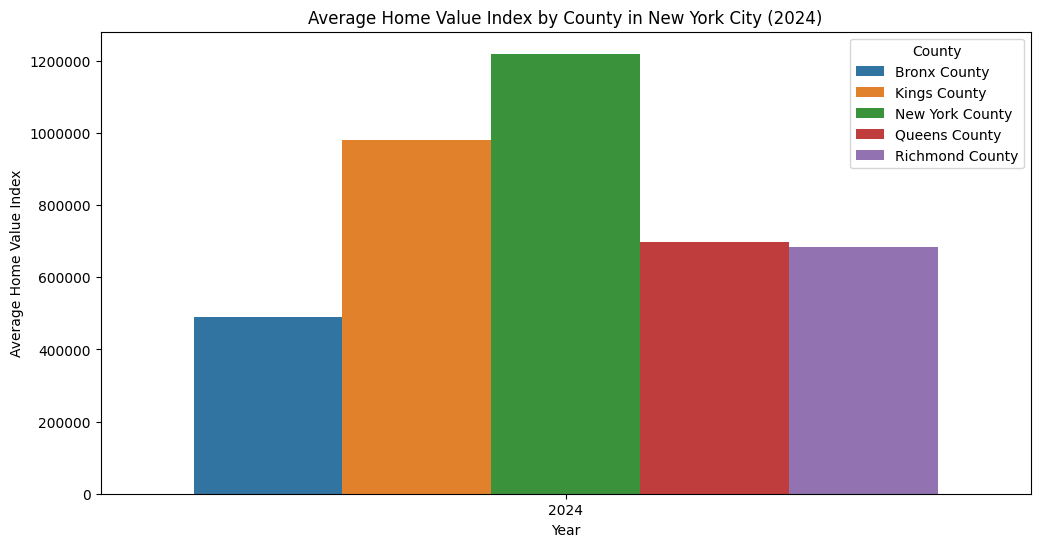

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(data = nyc_county_HVI_avg[nyc_county_HVI_avg['Year']==2024], x = 'Year', y = 'HVI', hue = 'CountyName')
plt.title('Average Home Value Index by County in New York City (2024)')
plt.xlabel('Year')
plt.ylabel('Average Home Value Index')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(title = 'County')
plt.show()

The above bar plot showed the average house value index of each county in New York City. The house value index of New York County is the highest (about \$1,200,000), followed by Kings County and Queens County. Bronx county has the lowest average house value index (about \$500,000).

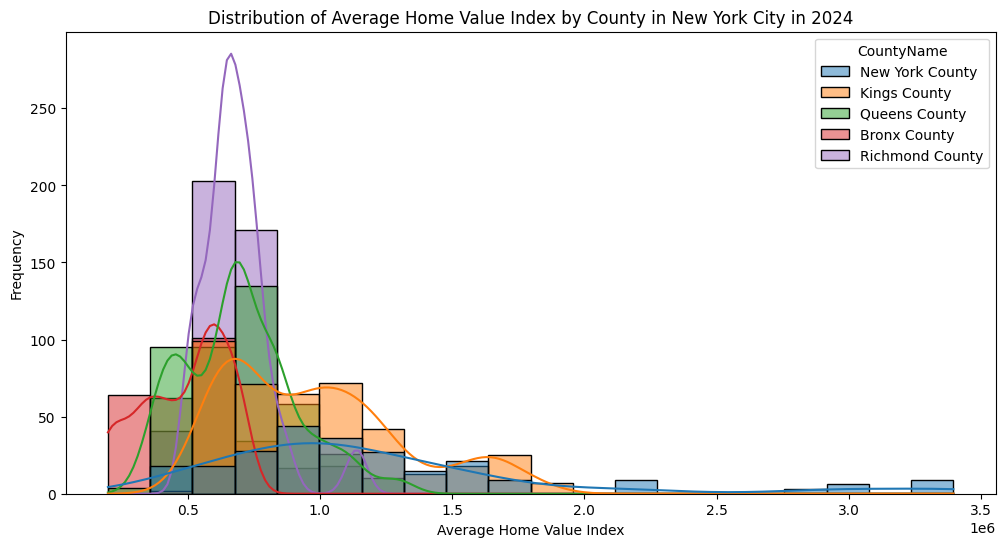

In [21]:
# Plot the histogram of the average HVI for each County in 2024
plt.figure(figsize=(12,6))
sns.histplot(data = nyc_neighbor_HVI_long[nyc_neighbor_HVI_long['Year']==2024], x = 'HVI', hue = 'CountyName', bins = 20, kde = True)
plt.title('Distribution of Average Home Value Index by County in New York City in 2024')
plt.xlabel('Average Home Value Index')
plt.ylabel('Frequency')
plt.show()

The distributions of house value index in each county are pretty different. The house value index of New York County is highly right-skewed with outliers above \$3,000,000. The house value index of Bronx County is a bit left-skewed. Based on the peaks of the distributions, value of most of the houses in NYC are between \$50,000 and $1,000,000.

In [25]:
# write the data to a csv file
nyc_county_HVI_avg.to_csv('./data/nyc_county_HVI_avg.csv.gz', index = False, compression='gzip')

## Data Manipulation

## Data Visualization